# Appendix 1

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import statsmodels.api as sm
from plotnine import *
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix
%matplotlib inline


In [2]:
dt = pd.read_csv('AB_NYC_2019.csv')

In [3]:
dt.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [6]:
dt.info()
# create correlation matrix     
corr = dt.corr()

# barplot of the correlation matrix     
plt.figure(figsize=(20,20))
sb.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, annot=True)

corr = dt.corr()
corr.style.background_gradient(cmap='coolwarm')

corr = dt.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

corr = dt.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2).set_properties(**{'font-size': '8pt', 'max-width': '80px', 'font-family': 'Calibri'})

corr = dt.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2).set_properties(**{'font-size': '8pt', 'max-width': '80px', 'font-family': 'Calibri'}).set_caption('Correlation Matrix')

corr = dt.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2).set_properties(**{'font-size': '8pt', 'max-width': '80px', 'font-family': 'Calibri'}).set_caption('Correlation Matrix').set_table_styles([dict(selector='caption',props=[('text-align', 'center')])])



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

C:\Users\Indra Dewaji\AppData\Local\Temp\ipykernel_12392\457848169.py:15: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
C:\Users\Indra Dewaji\AppData\Local\Temp\ipykernel_12392\457848169.py:18: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
C:\Users\Indra Dewaji\AppData\Local\Temp\ipykernel_12392\457848169.py:21: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
C:\Users\Indra Dewaji\AppData\Local\Temp\ipykernel_12392\457848169.py:24: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`


In [20]:
dt.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [21]:
dt.describe()

id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min          1.000000           0.000000           0.010000   
25%          1.000000           1.000000           0.190000   
50%          3.000000           5.000000           0.720000   
75%          5.000000          24.000000           2.020000   
max       1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365  
count                    48895.000000      48895.000000  
mean                         7.143982        112.781327  
std                         32.952519        131.622289  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         45.000000  
75%                          2.000000        227.000000  
max                        327.000000        365.000000

# Appendix 2

In [22]:
neighbourhood_group = dt['neighbourhood_group'].value_counts()[:10]
neighbourhood_group

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

<AxesSubplot: ylabel='neighbourhood_group'>

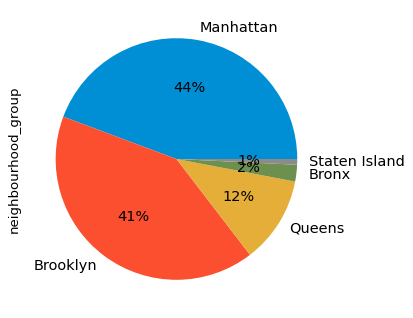

In [23]:
fig = plt.figure(figsize=(5,5), dpi=80)
dt['neighbourhood_group'].value_counts().plot(kind='pie',  autopct='%1.0f%%', startangle=360, fontsize=13)

<AxesSubplot: >

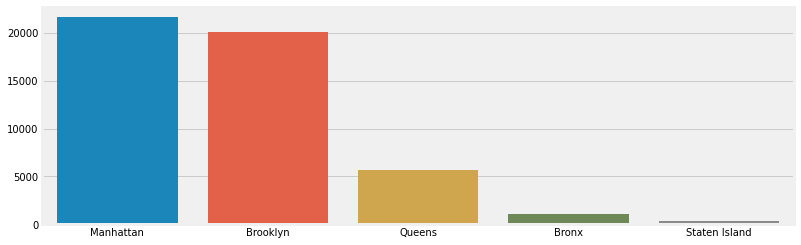

In [24]:
plt.figure(figsize = (12,4))
sb.barplot(x = neighbourhood_group.index, y = neighbourhood_group.values, order = neighbourhood_group.index)

In [25]:
room_type = dt['room_type'].value_counts()[:10]
room_type

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [26]:
fig = plt.figure(figsize=(5,5), dpi=80)
dt['room_type'].value_counts().plot(kind='pie',  autopct='%1.0f%%', startangle=360, fontsize=13)

<AxesSubplot: ylabel='room_type'>

In [27]:
plt.figure(figsize = (12,4))
sb.barplot(x = room_type.index, y = room_type.values, order = room_type.index)

<AxesSubplot: >

# Appendix 3

In [28]:
df = (dt.groupby('neighbourhood_group')['room_type']
         .value_counts(normalize=True)
         .mul(100)
         .round(2)
         .unstack())

fig, ax = plt.subplots(figsize = (12,6))

df.plot(kind= "bar",
        stacked = True,
        ax = ax,
        width = 0.3,
        edgecolor = "black")

# Adding bar labels
for c in ax.containers:
    labels = [str(round(v.get_height(), 2)) + "%" if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c,
                 label_type='center',
                 labels = labels,
                 size = 14) # add a container object "c" as first argument
# Removing spines
for s in ["top", "right"]:
    ax.spines[s].set_visible(False)
# Adding tick and axes labels
ax.tick_params(labelsize = 14, labelrotation = 0)
ax.set_ylabel("Percentage", size = 14)
ax.set_xlabel("Neighbourhood Group", size = 14)

# Fixing legend position
ax.legend_.set_bbox_to_anchor([0.99, 0.8])


Text(0.5, 1.0, 'Room Type vs Price in the Neighbourhood Group')

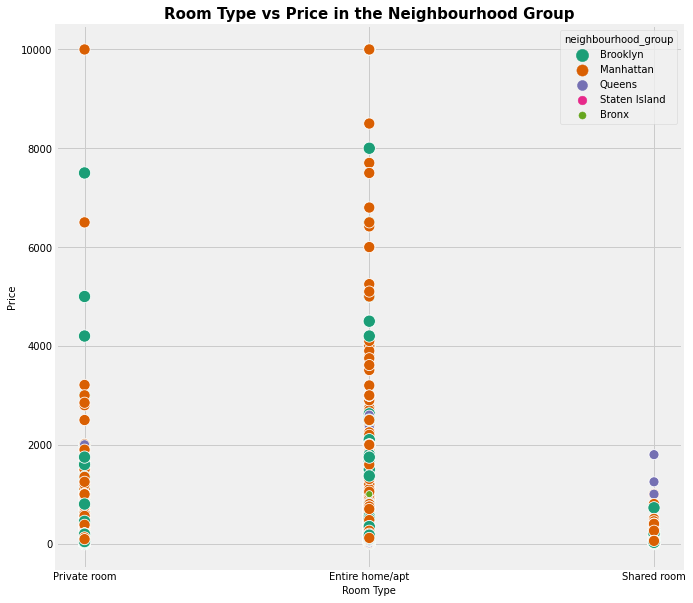

In [29]:
plt.figure(figsize=(10,10))
sb.scatterplot(x="room_type", 
               y="price",
               hue="neighbourhood_group", 
               size="neighbourhood_group",
               sizes=(50, 150), 
               palette="Dark2", 
               data=dt)

plt.xlabel("Room Type", size=10)
plt.ylabel("Price", size=10)
plt.title("Room Type vs Price in the Neighbourhood Group",size=15, weight='bold')

In [30]:
plt.figure(figsize=(12,5))
sb.scatterplot(x = dt['longitude'], y = dt['latitude'], hue = dt['neighbourhood_group'])
plt.show()

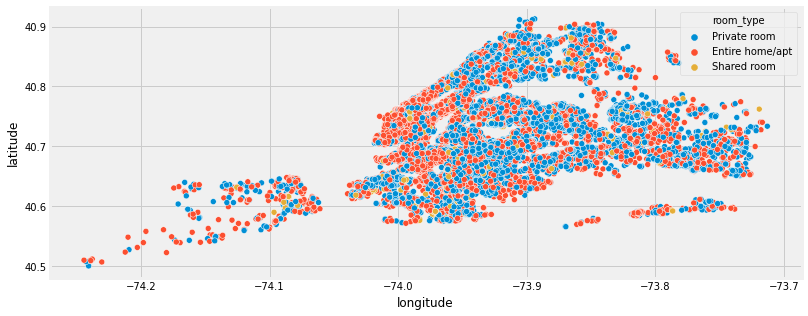

In [31]:
plt.figure(figsize=(12,5))
sb.scatterplot(x = dt['longitude'], y = dt['latitude'], hue = dt['room_type'])
plt.show()


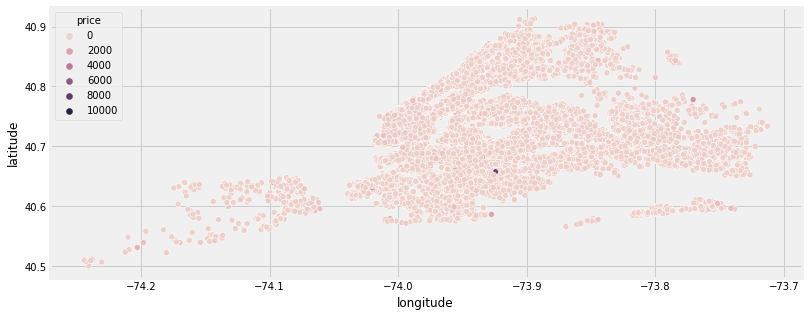

In [32]:
plt.figure(figsize=(12,5))
sb.scatterplot(x = dt['longitude'], y = dt['latitude'], hue = dt['price'])
plt.show()

In [33]:
plt.figure(figsize=(12,5))
sb.scatterplot(x = dt['longitude'], y = dt['latitude'], hue = dt['reviews_per_month'])
plt.show()

In [34]:
x = dt.iloc[:,4:16]
x.describe()

latitude     longitude         price  minimum_nights  \
count  48895.000000  48895.000000  48895.000000    48895.000000   
mean      40.728949    -73.952170    152.720687        7.029962   
std        0.054530      0.046157    240.154170       20.510550   
min       40.499790    -74.244420      0.000000        1.000000   
25%       40.690100    -73.983070     69.000000        1.000000   
50%       40.723070    -73.955680    106.000000        3.000000   
75%       40.763115    -73.936275    175.000000        5.000000   
max       40.913060    -73.712990  10000.000000     1250.000000   

       number_of_reviews  reviews_per_month  calculated_host_listings_count  \
count       48895.000000       38843.000000                    48895.000000   
mean           23.274466           1.373221                        7.143982   
std            44.550582           1.680442                       32.952519   
min             0.000000           0.010000                        1.000000   
25%             1.000000           0.190000                        1.000000   
50%             5.000000           0.720000                        1.000000   
75%            24.000000           2.020000                        2.000000   
max           629.000000          58.500000                      327.000000   

       availability_365  
count      48895.000000  
mean         112.781327  
std          131.622289  
min            0.000000  
25%            0.000000  
50%           45.000000  
75%          227.000000  
max          365.000000

In [35]:
plt.figure(figsize=(10,6))
ax = sb.boxplot(data=dt, x='neighbourhood_group',y='availability_365')

In [80]:
corr_matrix = dt.corr()
plt.figure(figsize=(14,8))
sb.heatmap(corr_matrix, annot=True)

<AxesSubplot: >

In [37]:
dt.drop(['id','host_id','host_name','name','latitude','longitude','last_review'], axis=1, inplace=True)
dt.head()


neighbourhood_group neighbourhood        room_type  price  minimum_nights  \
0            Brooklyn    Kensington     Private room    149               1   
1           Manhattan       Midtown  Entire home/apt    225               1   
2           Manhattan        Harlem     Private room    150               3   
3            Brooklyn  Clinton Hill  Entire home/apt     89               1   
4           Manhattan   East Harlem  Entire home/apt     80              10   

   number_of_reviews  reviews_per_month  calculated_host_listings_count  \
0                  9               0.21                               6   
1                 45               0.38                               2   
2                  0                NaN                               1   
3                270               4.64                               1   
4                  9               0.10                               1   

   availability_365  
0               365  
1               355  
2               365  
3               194  
4                 0

In [38]:
dt.isna().sum()

neighbourhood_group                   0
neighbourhood                         0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [39]:
dt['reviews_per_month'].describe()

count    38843.000000
mean         1.373221
std          1.680442
min          0.010000
25%          0.190000
50%          0.720000
75%          2.020000
max         58.500000
Name: reviews_per_month, dtype: float64

In [40]:
dt['reviews_per_month'] = dt['reviews_per_month'].fillna(0)

In [41]:
dt.isna().sum()

neighbourhood_group               0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [42]:
fig = px.box(dt, y="price")
fig.update_layout(
    autosize = False,
    width = 400,
    height = 400
)
fig.show()

<AxesSubplot: >

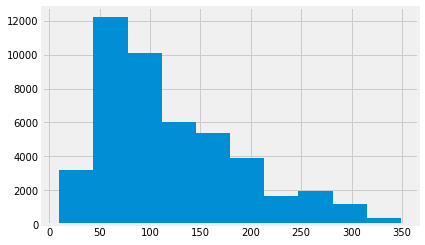

In [43]:
price = dt["price"][dt["price"] < 350]
price[price > 0].hist()

In [44]:
dt = dt[dt["price"]<350]
dt = dt[dt["price"]>0]
dt['room_type'].value_counts()

Entire home/apt    22909
Private room       22001
Shared room         1137
Name: room_type, dtype: int64

In [45]:
fig = px.box(dt, y="price")
fig

# Multilinear Regression

In [46]:
dt.fillna({'reviews_per_month':0}, inplace=True)
dt = pd.get_dummies(dt, columns=['neighbourhood_group',"room_type"], prefix = ['Area',"RoomType"],drop_first=True)
dt.drop(["neighbourhood"], axis=1, inplace=True)
dt.head()

price  minimum_nights  number_of_reviews  reviews_per_month  \
0    149               1                  9               0.21   
1    225               1                 45               0.38   
2    150               3                  0               0.00   
3     89               1                270               4.64   
4     80              10                  9               0.10   

   calculated_host_listings_count  availability_365  Area_Brooklyn  \
0                               6               365              1   
1                               2               355              0   
2                               1               365              0   
3                               1               194              1   
4                               1                 0              0   

   Area_Manhattan  Area_Queens  Area_Staten Island  RoomType_Private room  \
0               0            0                   0                      1   
1               1            0                   0                      0   
2               1            0                   0                      1   
3               0            0                   0                      0   
4               1            0                   0                      0   

   RoomType_Shared room  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0

In [47]:
dt.shape

(46047, 12)

In [81]:
X = dt.drop(['price'],axis=1)
y = dt['price'].values.reshape(-1,1)


stdc_X = StandardScaler()
stdc_y = StandardScaler()

X = stdc_X.fit_transform(X)
y = stdc_X.fit_transform(y)

In [82]:
from sklearn.model_selection import train_test_split
Xval_train, Xval_test, yval_train, yval_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [83]:
print(Xval_train.shape)
print(yval_train.shape)
print(Xval_test.shape)
print(yval_test.shape)

(32232, 11)
(32232, 1)
(13815, 11)
(13815, 1)


In [85]:
# instantiate
linear_reg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linear_reg.fit(Xval_train, yval_train)

# get the intercept and coefficients
print("intercept is: ",linear_reg.intercept_)

print("coefficients are: ",linear_reg.coef_)



intercept is:  [-0.00089255]
coefficients are:  [[-0.04661163 -0.00682679 -0.00602913  0.07803967  0.05395145  0.14050369
   0.35689951  0.04753334  0.00408103 -0.56878032 -0.2315111 ]]


In [87]:
yval_pred = linear_reg.predict(Xval_test)

In [88]:
print("R Square Value",r2_score(yval_test,yval_pred))
print("\n")
print ("MAE :",metrics.mean_absolute_error(yval_test, yval_pred))
print("\n")
print ("MSE : ",metrics.mean_squared_error(yval_test, yval_pred))
print("\n")
print ("RMSE : ",np.sqrt(metrics.mean_squared_error(yval_test, yval_pred)))


R Square Value 0.4536224559047578


MAE : 0.5403812490788075


MSE :  0.5432986459802194


RMSE :  0.7370879499627024


In [57]:
my_pipeline = Pipeline(steps=[('model', LinearRegression())])

from sklearn.model_selection import cross_val_score

# Sklearn calculates as negative scores, hence muliply by -1
scor1 =  1 * cross_val_score(my_pipeline, X, y,
                              cv=10,
                              scoring='r2')
scor2 = -1 * cross_val_score(my_pipeline, X, y,
                              cv=10,
                              scoring='neg_mean_absolute_error')
scor3 = -1 * cross_val_score(my_pipeline, X, y,
                              cv=10,
                              scoring='neg_root_mean_squared_error')

print("R squared scores:\n", scor1)
print("Avg R squared score):",scor1.mean())
print("RMSE scores:\n", scor3)
print("Avg RMSE score:",scor3.mean())

R squared scores:
 [0.35329708 0.39936768 0.4426406  0.46440209 0.43410638 0.43390482
 0.44827436 0.50087265 0.51396502 0.49199695]
Avg R squared score): 0.4482827625750364
RMSE scores:
 [0.78299115 0.71666542 0.71765647 0.70134354 0.70919094 0.72100443
 0.71616921 0.75807345 0.73186071 0.80572924]
Avg RMSE score: 0.7360684547082398


In [240]:
x2 = sm.add_constant(X)
est1 = sm.OLS(y, x2)
#OLS is Ordinary Least Squares
#est.TAB
est2 = est1.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.462
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     3594.
Date:                Sun, 30 Oct 2022   Prob (F-statistic):               0.00
Time:                        17:13:31   Log-Likelihood:                -51064.
No. Observations:               46047   AIC:                         1.022e+05
Df Residuals:                   46035   BIC:                         1.023e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.776e-17      0.003   8.12e-15      1.0

# KNN

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot: xlabel='availability_365', ylabel='count'>

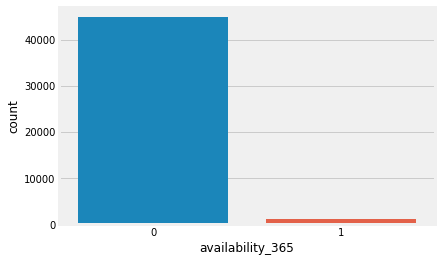

In [58]:
df_classif = dt
df_classif['availability_365'] = df_classif['availability_365'].apply(lambda x: 1 if x == 365 else 0)
sb.countplot(df_classif['availability_365'])


In [59]:
X = df_classif.drop(['availability_365'],axis=1)
y = df_classif['availability_365'].values
#X = df_classif.drop(['price'],axis=1)
#y = df_classif['price'].values

In [60]:
from imblearn.over_sampling import SMOTE
import imblearn
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [61]:
sb.countplot(y)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot: ylabel='count'>

In [245]:
len(y)

89872

In [65]:
# Get ROC
def get_roc(fp, tp):
    plt.plot(fp, tp, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False pos Rate')
    plt.ylabel('True pos Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

# Get classification result
def get_classification_results(): 
  conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
  print('Confusion matrix:\n', conf_mat)

  labels = ['Class 0', 'Class 1']
  fig = plt.figure()
  ax = fig.add_subplot(111)
  cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
  fig.colorbar(cax)
  ax.set_xticklabels([''] + labels)
  ax.set_yticklabels([''] + labels)
  plt.xlabel('Predicted')
  plt.ylabel('Expected')
  plt.show()

  print("Accuracy", metrics.accuracy_score(y_test, y_pred))

  from sklearn.metrics import classification_report
  print(classification_report(y_test, y_pred))
  
  auc_score = roc_auc_score(y_test, y_pred)
  print("AUC Score: ")
  print(auc_score)

  fp, tp, thresholds = roc_curve(y_test, y_pred)
  get_roc(fp, tp)

Confusion matrix:
 [[11600  1968]
 [  441 12953]]


C:\Users\Indra Dewaji\AppData\Local\Temp\ipykernel_34488\707423635.py:21: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\Indra Dewaji\AppData\Local\Temp\ipykernel_34488\707423635.py:22: UserWarning:

FixedFormatter should only be used together with FixedLocator



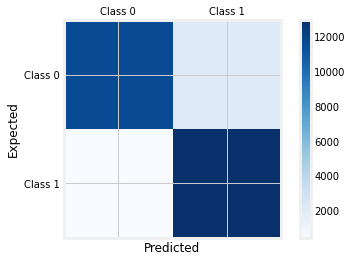

Accuracy 0.9106520287812477
              precision    recall  f1-score   support

           0       0.96      0.85      0.91     13568
           1       0.87      0.97      0.91     13394

    accuracy                           0.91     26962
   macro avg       0.92      0.91      0.91     26962
weighted avg       0.92      0.91      0.91     26962

AUC Score: 
0.9110138199024627


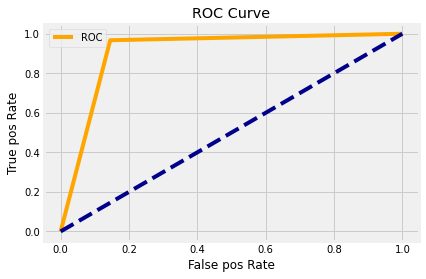

In [66]:
classifier = KNeighborsClassifier()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

get_classification_results()

Minimum error:- 0.06371930865662785 at K = 0


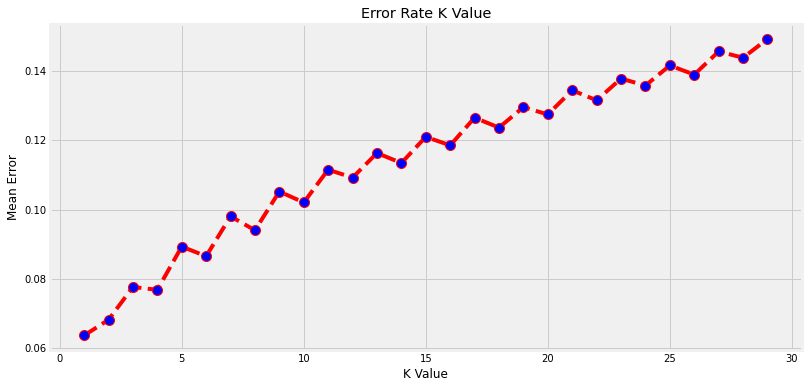

In [67]:
error = []
# Calculating error for K values between 1 and 30
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 30), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
print("Minimum error:-",min(error),"at K =",error.index(min(error)))

In [68]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.cluster import KMeans 

%matplotlib inline

dt_knn = pd.read_csv('AB_NYC_2019.csv')
dt_knn

id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

           host_name neighbourhood_group       neighbourhood  latitude  \
0               John            Brooklyn          Kensington  40.64749   
1           Jennifer           Manhattan             Midtown  40.75362   
2          Elisabeth           Manhattan              Harlem  40.80902   
3        LisaRoxanne            Brooklyn        Clinton Hill  40.68514   
4              Laura           Manhattan         East Harlem  40.79851   
...              ...                 ...                 ...       ...   
48890        Sabrina            Brooklyn  Bedford-Stuyvesant  40.67853   
48891        Marisol            Brooklyn            Bushwick  40.70184   
48892  Ilgar & Aysel           Manhattan              Harlem  40.81475   
48893            Taz           Manhattan      Hell's Kitchen  40.75751   
48894     Christophe           Manhattan      Hell's Kitchen  40.76404   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0      -73.97237     Private room    149               1                  9   
1      -73.98377  Entire home/apt    225               1                 45   
2      -73.94190     Private room    150               3                  0   
3      -73.95976  Entire home/apt     89               1                270   
4      -73.94399  Entire home/apt     80              10                  9   
...          ...              ...    ...             ...                ...   
48890  -73.94995     Private room     70               2                  0   
48891  -73.93317     Private room     40               4                  0   
48892  -73.94867  Entire home/apt    115              10                  0   
48893  -73.99112      Shared room     55               1                  0   
48894  -73.98933     Private room     90               7                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
0      2018-10-19               0.21                               6   
1      2019-05-21               0.38                               2   
2             NaN                NaN                               1   
3      2019-07-05               4.64                               1   
4      2018-11-19               0.10                               1   
...           ...                ...                             ...   
48890         NaN                NaN                               2   
48891         NaN                NaN                               2   
48892         NaN                NaN                               1   
48893         NaN                NaN                               6   
48894         NaN                NaN                               1   

       availability_365  
0                   365  
1                   355  
2                   365  
3                   194  
4                     0  
...                 ...  
48890                 9  
48891                36  
48892                27  
48893                 2  
48894                23  

[48895 rows x 16 columns]

# KNN Version 2

In [69]:
dt_knn.drop(['neighbourhood_group','room_type','neighbourhood','id','host_id','host_name','name','latitude','longitude','last_review'], axis=1, inplace=True)
dt_knn.head()

price  minimum_nights  number_of_reviews  reviews_per_month  \
0    149               1                  9               0.21   
1    225               1                 45               0.38   
2    150               3                  0                NaN   
3     89               1                270               4.64   
4     80              10                  9               0.10   

   calculated_host_listings_count  availability_365  
0                               6               365  
1                               2               355  
2                               1               365  
3                               1               194  
4                               1                 0

In [70]:
from sklearn.preprocessing import StandardScaler
X = dt_knn.values[:,0:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[-1.54930695e-02, -2.93996210e-01, -3.20413582e-01,
        -5.51510938e-01, -3.47164266e-02,  1.91625031e+00],
       [ 3.00973546e-01, -2.93996210e-01,  4.87664928e-01,
        -4.45079101e-01, -1.56104443e-01,  1.84027456e+00],
       [-1.13290351e-02, -1.96484417e-01, -5.22433210e-01,
        -6.82985560e-01, -1.86451447e-01,  1.91625031e+00],
       ...,
       [-1.57070239e-01,  1.44806857e-01, -5.22433210e-01,
        -6.82985560e-01, -1.86451447e-01, -6.51730078e-01],
       [-4.06912304e-01, -2.93996210e-01, -5.22433210e-01,
        -6.82985560e-01, -3.47164266e-02, -8.41669456e-01],
       [-2.61171100e-01, -1.46083215e-03, -5.22433210e-01,
        -6.82985560e-01, -1.86451447e-01, -6.82120378e-01]])

In [71]:
from sklearn.cluster import KMeans
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[0 0 0 ... 2 2 2]


In [72]:
dt_knn["price"] = labels
dt_knn.head(5)

price  minimum_nights  number_of_reviews  reviews_per_month  \
0      0               1                  9               0.21   
1      0               1                 45               0.38   
2      0               3                  0                NaN   
3      0               1                270               4.64   
4      2              10                  9               0.10   

   calculated_host_listings_count  availability_365  
0                               6               365  
1                               2               355  
2                               1               365  
3                               1               194  
4                               1                 0

In [73]:
dt_knn.groupby('price').mean()

minimum_nights  number_of_reviews  reviews_per_month  \
price                                                         
0           10.735194          33.941147           1.701831   
1           24.417722           2.886076           0.746774   
2            5.148699          18.029243           1.207745   

       calculated_host_listings_count  availability_365  
price                                                    
0                           17.296795        281.265670  
1                            2.721519        190.962025  
2                            2.115164         28.961837

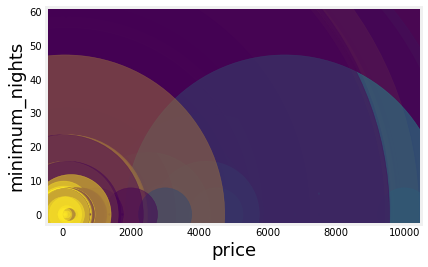

In [74]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float64), alpha=0.5)
plt.xlabel('price', fontsize=18)
plt.ylabel('minimum_nights', fontsize=18)

plt.show()

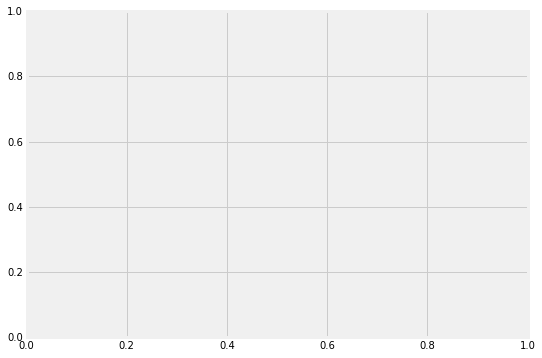

In [75]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
ax.set_xlabel('Minimum Nights')
ax.set_ylabel('Reviews per Month')
ax.set_zlabel('Availability')

ax.scatter(X[:, 0], X[:, 2], X[:, 5], c= labels.astype(np.float64))

In [76]:
sse = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, init= "k-means++",n_init= 12,max_iter= 300)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

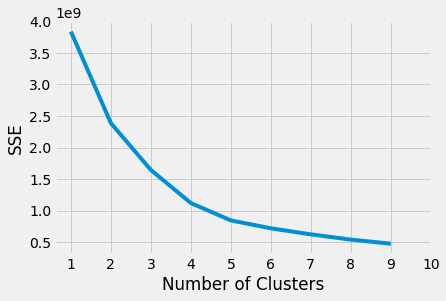

In [77]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 10), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [78]:
from sklearn.metrics import silhouette_score, silhouette_samples

silhouette_coefficients = []
# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, init= "k-means++",n_init= 12,max_iter= 300)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_coefficients.append(score)

silhouette_coefficients

MemoryError: Unable to allocate 1.00 GiB for an array with shape (2745, 48895) and data type float64

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 10), silhouette_coefficients)
plt.xticks(range(2, 10))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()